# there is nan in total -->11

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (f1_score, precision_score, recall_score, accuracy_score,
                             roc_auc_score, confusion_matrix, make_scorer)

df=pd.read_csv('telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isna().sum()

np.int64(11)

In [31]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4760\266577964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [32]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isna().sum()

np.int64(0)

In [33]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("------------")


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
------------
gender
['Female' 'Male']
------------
SeniorCitizen
[0 1]
------------
Partner
['Yes' 'No']
------------
Dependents
['No' 'Yes']
------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
------------
PhoneService
['No' 'Yes']
------------
MultipleLines
['No phone service' 'No' 'Yes']
------------
InternetService
['DSL' 'Fiber optic' 'No']
------------
OnlineSecurity
['No' 'Yes' 'No internet service']
------------
OnlineBackup
['Yes' 'No' 'No internet service']
------------
DeviceProtection
['No' 'Yes' 'No internet service']
------------
TechSupport
['No' 'Yes' 'No internet service']
------------
StreamingTV
['No' 'Yes' 'No internet service']
------------
StreamingMovies
['No' 'Yes' 'No internet s

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
df=df.drop(['customerID'] , axis=1)

In [36]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [37]:
df.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
#do label encoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])


In [39]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [40]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [41]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [42]:
print(y.value_counts())
print("-----------------------")
print(y.value_counts(normalize=True) * 100)


Churn
0    5174
1    1869
Name: count, dtype: int64
-----------------------
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


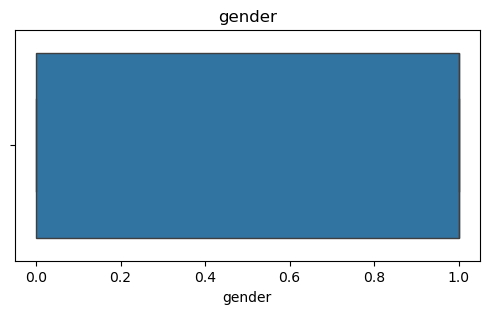

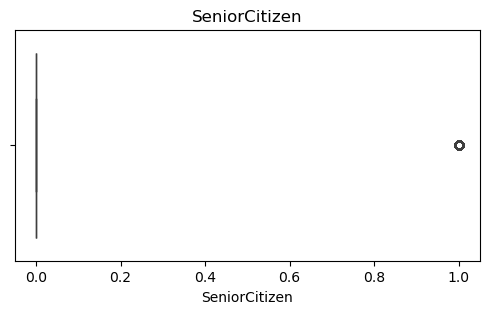

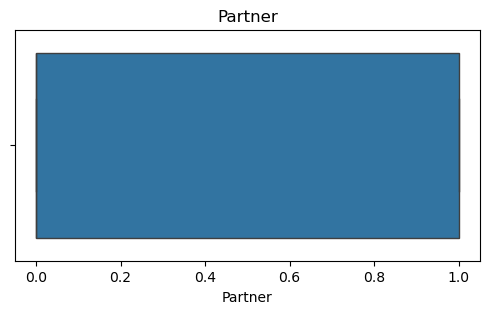

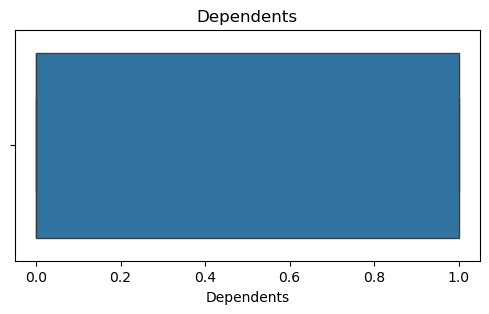

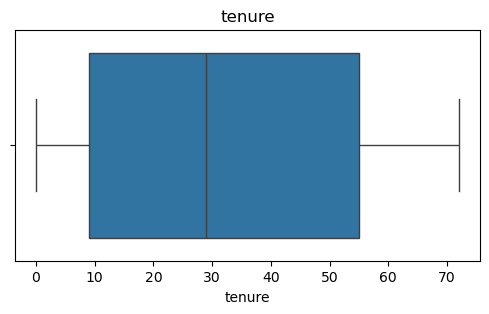

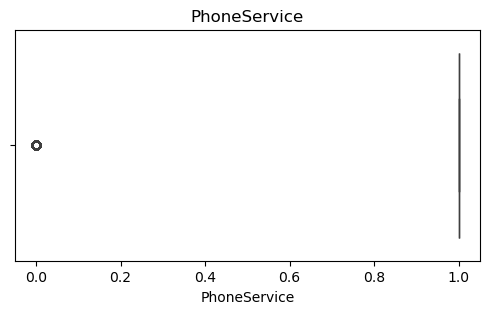

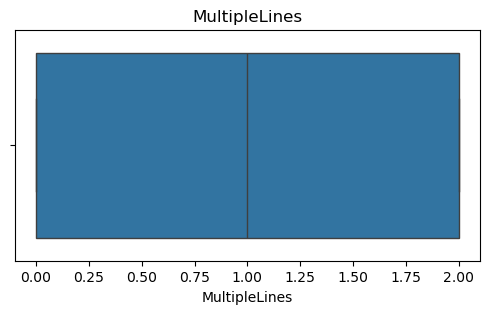

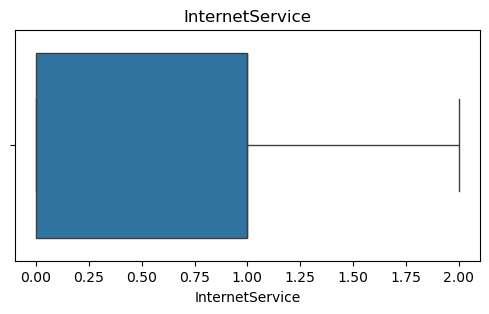

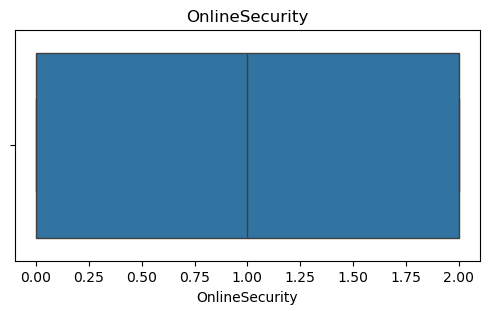

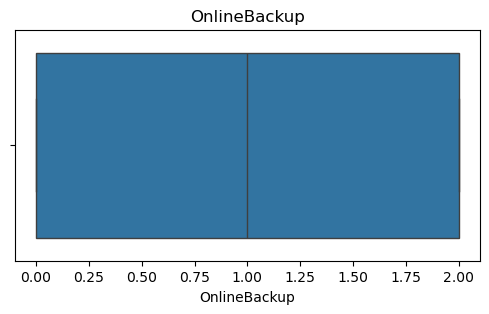

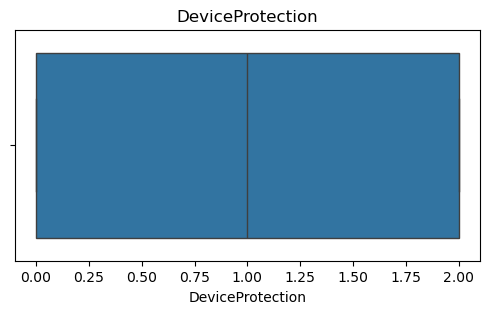

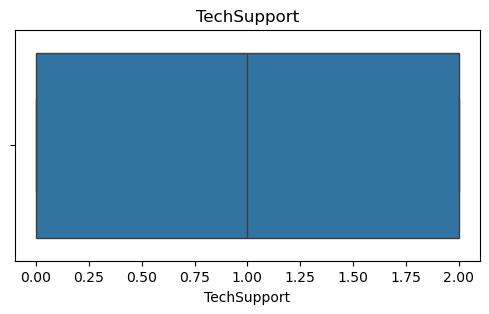

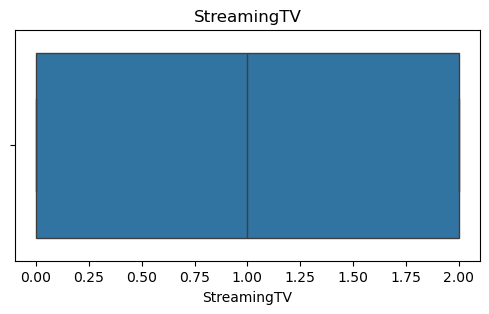

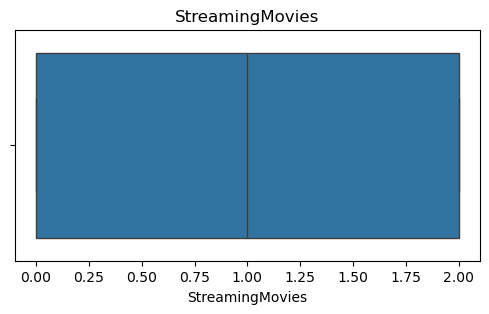

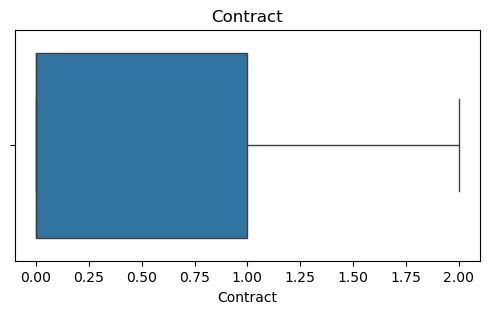

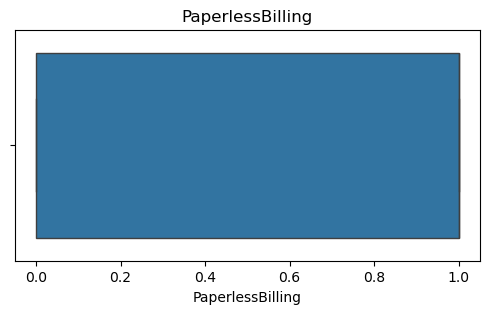

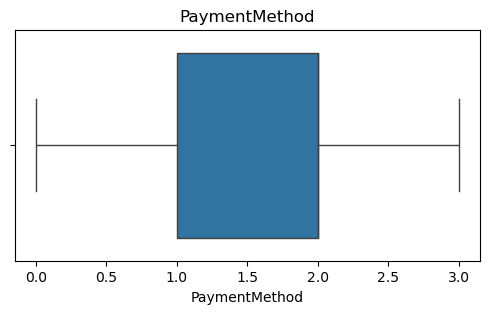

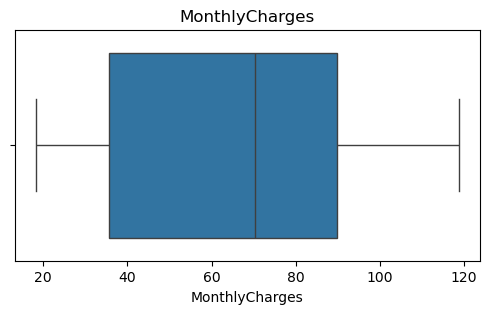

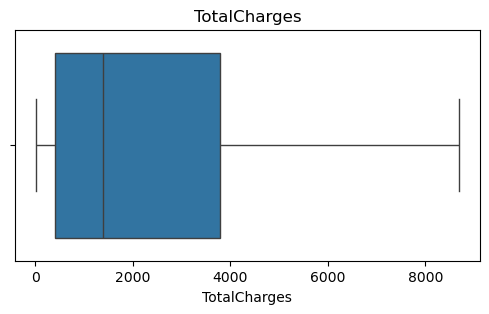

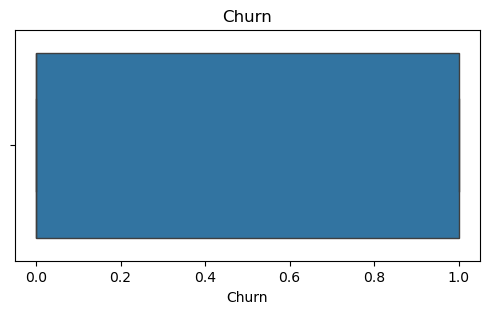

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [44]:
import numpy as np

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"Column: {col}")
    print(f"Number of Outliers: {outliers.shape[0]}")
    print("--------------")


Column: gender
Number of Outliers: 0
--------------
Column: SeniorCitizen
Number of Outliers: 1142
--------------
Column: Partner
Number of Outliers: 0
--------------
Column: Dependents
Number of Outliers: 0
--------------
Column: tenure
Number of Outliers: 0
--------------
Column: PhoneService
Number of Outliers: 682
--------------
Column: MultipleLines
Number of Outliers: 0
--------------
Column: InternetService
Number of Outliers: 0
--------------
Column: OnlineSecurity
Number of Outliers: 0
--------------
Column: OnlineBackup
Number of Outliers: 0
--------------
Column: DeviceProtection
Number of Outliers: 0
--------------
Column: TechSupport
Number of Outliers: 0
--------------
Column: StreamingTV
Number of Outliers: 0
--------------
Column: StreamingMovies
Number of Outliers: 0
--------------
Column: Contract
Number of Outliers: 0
--------------
Column: PaperlessBilling
Number of Outliers: 0
--------------
Column: PaymentMethod
Number of Outliers: 0
--------------
Column: Monthly

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [46]:
x_train.shape

(5634, 19)

In [47]:
x_test.shape

(1409, 19)

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [49]:
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
x_train_scaled[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test_scaled[num_cols] = scaler.transform(x_test[num_cols])
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [50]:
#use smote
from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(random_state=42, k_neighbors=5)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)
model.fit(x_train_smote, y_train_smote)
y_pred_smote = model.predict(x_test_scaled)
accuracy_score(y_test, y_pred_smote)
print(classification_report(y_test, y_pred_smote))
#confussion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_smote)


              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.49      0.80      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.72      0.74      1409



array([[720, 315],
       [ 74, 300]])

In [51]:
#use smote with randomforest
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
smote = BorderlineSMOTE(random_state=42, k_neighbors=5)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)
model = RandomForestClassifier()
model.fit(x_train_smote, y_train_smote)
y_pred_smote = model.predict(x_test_scaled)
accuracy_score(y_test, y_pred_smote)
print(classification_report(y_test, y_pred_smote))
#confussion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_smote)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.67      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



array([[820, 215],
       [125, 249]])

In [52]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)
model = xgb.XGBClassifier()
model.fit(x_train_smote, y_train_smote)
y_pred_smote = model.predict(x_test_scaled)
accuracy_score(y_test, y_pred_smote)
print(classification_report(y_test, y_pred_smote))
#
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_smote)

              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1035
           1       0.55      0.69      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



array([[824, 211],
       [116, 258]])

In [53]:
from sklearn.utils import class_weight
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train_smote, y_train_smote)

print("Best parameters:", grid_search.best_params_)
y_pred = grid_search.predict(x_test_scaled)
print(classification_report(y_test, y_pred))

Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.56      0.65      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409



In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek

smote = SMOTETomek(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train_smote, y_train_smote)

print("Best parameters:", grid_search.best_params_)
y_pred = grid_search.predict(x_test_scaled)
print(classification_report(y_test, y_pred))

Best parameters: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1035
           1       0.55      0.67      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gnb = GaussianNB()
gnb.fit(x_train_smote, y_train_smote)
y_pred_nb = gnb.predict(x_test_scaled)

print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1035
           1       0.49      0.75      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409



In [57]:
!pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---

In [58]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                          scale_pos_weight=(y_train_smote.value_counts()[0]/y_train_smote.value_counts()[1]),
                          random_state=42)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42)),
    ('cat', CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=42))
]
final_estimator = LogisticRegression(class_weight='balanced', max_iter=1000)
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1,
    passthrough=True
)

stack_model.fit(x_train_smote, y_train_smote)

y_pred_stack = stack_model.predict(x_test_scaled)
print("Stacking Ensemble Results:")
print(classification_report(y_test, y_pred_stack))


Stacking Ensemble Results:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.56      0.63      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409



In [59]:

scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test_scaled[num_cols] = scaler.transform(x_test[num_cols])

smote = SMOTE(random_state=42, k_neighbors=5)
x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

f1_scorer = make_scorer(f1_score, pos_label=1)

base_learners = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                          scale_pos_weight=(y_train_res.value_counts()[0]/y_train_res.value_counts()[1]),
                          random_state=42)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42)),
    ('cat', CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=42))
]

final_estimator = LogisticRegression(class_weight='balanced', max_iter=1000)

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1,
    passthrough=True
)

param_dist = {
    'rf__n_estimators': [200, 400, 600],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5, 10],

    'xgb__n_estimators': [200, 400, 600],
    'xgb__max_depth': [4, 6, 8],
    'xgb__learning_rate': [0.01, 0.05, 0.1],

    'lgbm__n_estimators': [200, 400, 600],
    'lgbm__max_depth': [6, 10, 15],
    'lgbm__learning_rate': [0.01, 0.05, 0.1],

    'cat__iterations': [200, 400, 600],
    'cat__depth': [4, 6, 8],
    'final_estimator__C': [0.1, 1, 10]
}

random_search = RandomizedSearchCV(
    estimator=stack_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring=f1_scorer,
    cv=StratifiedKFold(n_splits=3),
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train_res, y_train_res)

print("Best parameters found:")
print(random_search.best_params_)

y_pred_best = random_search.predict(x_test_scaled)
print("Optimized Stacking Ensemble Results:")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:
{'xgb__n_estimators': 600, 'xgb__max_depth': 8, 'xgb__learning_rate': 0.1, 'rf__n_estimators': 600, 'rf__min_samples_split': 2, 'rf__max_depth': None, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 15, 'lgbm__learning_rate': 0.01, 'final_estimator__C': 10, 'cat__iterations': 400, 'cat__depth': 4}
Optimized Stacking Ensemble Results:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.56      0.60      0.58       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409



In [60]:


le_dict = {}
for col in x_train.columns:
    if x_train[col].dtype == 'object':
        le = LabelEncoder()
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.transform(x_test[col])
        le_dict[col] = le

if 'TotalCharges' in x_train.columns:
    x_train['TotalCharges'] = pd.to_numeric(x_train['TotalCharges'], errors='coerce').fillna(0)
    x_test['TotalCharges'] = pd.to_numeric(x_test['TotalCharges'], errors='coerce').fillna(0)

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test_scaled[num_cols] = scaler.transform(x_test[num_cols])

smote = SMOTE(random_state=42, k_neighbors=5)
x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

base_learners = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                          scale_pos_weight=(y_train_res.value_counts()[0]/y_train_res.value_counts()[1]),
                          random_state=42)),
    ('lgbm', LGBMClassifier(class_weight='balanced', random_state=42)),
    ('cat', CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=42))
]

final_estimator = LogisticRegression(class_weight='balanced', max_iter=1000)

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1,
    passthrough=True
)

param_dist = {
    'rf__n_estimators': [200, 400],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5],

    'xgb__n_estimators': [200, 400],
    'xgb__max_depth': [4, 6],
    'xgb__learning_rate': [0.01, 0.1],

    'lgbm__n_estimators': [200, 400],
    'lgbm__max_depth': [6, 10],
    'lgbm__learning_rate': [0.01, 0.1],

    'cat__iterations': [200, 400],
    'cat__depth': [4, 6],
    'final_estimator__C': [0.1, 1, 10]
}

f1_scorer = make_scorer(f1_score, pos_label=1)

random_search = RandomizedSearchCV(
    estimator=stack_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring=f1_scorer,
    cv=StratifiedKFold(n_splits=3),
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train_res, y_train_res)

best_stack_model = random_search.best_estimator_

y_pred_proba_stack = best_stack_model.predict_proba(x_test_scaled)[:,1]

best_rf_model = best_stack_model.named_estimators_['rf']
best_xgb_model = best_stack_model.named_estimators_['xgb']
best_lgbm_model = best_stack_model.named_estimators_['lgbm']
best_cat_model = best_stack_model.named_estimators_['cat']

y_pred_proba_rf = best_rf_model.predict_proba(x_test_scaled)[:,1]
y_pred_proba_xgb = best_xgb_model.predict_proba(x_test_scaled)[:,1]
y_pred_proba_lgbm = best_lgbm_model.predict_proba(x_test_scaled)[:,1]
y_pred_proba_cat = best_cat_model.predict_proba(x_test_scaled)[:,1]

models_proba = {
    'XGBoost_Optimized': y_pred_proba_xgb,
    'LightGBM_Optimized': y_pred_proba_lgbm,
    'CatBoost_Optimized': y_pred_proba_cat,
    'RandomForest_Optimized': y_pred_proba_rf,
    'Stacking_Advanced': y_pred_proba_stack
}

results = []

for model_name, y_proba in models_proba.items():
    best_threshold = 0.5
    best_f1 = 0

    for threshold in np.arange(0.20, 0.70, 0.02):
        y_pred_temp = (y_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    y_pred_final = (y_proba >= best_threshold).astype(int)

    acc = accuracy_score(y_test, y_pred_final)
    precision = precision_score(y_test, y_pred_final)
    recall = recall_score(y_test, y_pred_final)
    f1 = f1_score(y_test, y_pred_final)
    roc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred_final)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

    results.append({
        'Model': model_name, 'Threshold': best_threshold, 'Accuracy': acc,
        'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc,
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp
    })

    print(f"\n{model_name}:")
    print(f"   F1: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}")
    print(f"   FN: {fn} | FP: {fp} | Threshold: {best_threshold:.2f}")

results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)

print("\n" + "="*80)
print(" FINAL COMPARISON")
print("="*80)
print(results_df[['Model', 'Threshold', 'F1-Score', 'Precision', 'Recall', 'FN', 'FP']].to_string(index=False))

best = results_df.iloc[0]
print(f"\n BEST MODEL: {best['Model']}")
print(f"   F1-Score:  {best['F1-Score']:.4f}")
print(f"   Precision: {best['Precision']:.4f}")
print(f"   Recall:    {best['Recall']:.4f}")
print(f"   Missed only {int(best['FN'])} churners out of {y_test.sum()}!")


Fitting 3 folds for each of 10 candidates, totalling 30 fits

XGBoost_Optimized:
   F1: 0.6169 | Precision: 0.5614 | Recall: 0.6845
   FN: 118 | FP: 200 | Threshold: 0.54

LightGBM_Optimized:
   F1: 0.6251 | Precision: 0.5422 | Recall: 0.7380
   FN: 98 | FP: 233 | Threshold: 0.52

CatBoost_Optimized:
   F1: 0.6224 | Precision: 0.5440 | Recall: 0.7273
   FN: 102 | FP: 228 | Threshold: 0.48

RandomForest_Optimized:
   F1: 0.6077 | Precision: 0.4974 | Recall: 0.7807
   FN: 82 | FP: 295 | Threshold: 0.38

Stacking_Advanced:
   F1: 0.6167 | Precision: 0.5705 | Recall: 0.6711
   FN: 123 | FP: 189 | Threshold: 0.50

 FINAL COMPARISON
                 Model  Threshold  F1-Score  Precision   Recall  FN  FP
    LightGBM_Optimized       0.52  0.625142   0.542240 0.737968  98 233
    CatBoost_Optimized       0.48  0.622426   0.544000 0.727273 102 228
     XGBoost_Optimized       0.54  0.616867   0.561404 0.684492 118 200
     Stacking_Advanced       0.50  0.616708   0.570455 0.671123 123 189
Rando

In [61]:

from sklearn.metrics import (
    f1_score, precision_score, recall_score, accuracy_score,
    roc_auc_score, confusion_matrix, classification_report
)
import numpy as np
import pandas as pd


proba_xgb = best_xgb_model.predict_proba(x_test_scaled)[:, 1]
proba_lgbm = best_lgbm_model.predict_proba(x_test_scaled)[:, 1]

soft_vote_proba = (proba_xgb + proba_lgbm) / 2


best_threshold = 0.5
best_f1 = 0

for threshold in np.arange(0.20, 0.70, 0.02):
    y_pred_temp = (soft_vote_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold


y_pred_soft = (soft_vote_proba >= best_threshold).astype(int)


acc = accuracy_score(y_test, y_pred_soft)
precision = precision_score(y_test, y_pred_soft)
recall = recall_score(y_test, y_pred_soft)
f1 = f1_score(y_test, y_pred_soft)
roc = roc_auc_score(y_test, soft_vote_proba)

cm = confusion_matrix(y_test, y_pred_soft)
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]


print("\n============================")
print("Soft Voting Ensemble (LGBM + XGB)")
print("============================")
print(f"F1-Score:  {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"ROC-AUC:   {roc:.4f}")
print(f"Threshold: {best_threshold:.2f}")

print("\nConfusion Matrix:")
print(f"TP: {tp} | FP: {fp}")
print(f"FN: {fn} | TN: {tn}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_soft))



Soft Voting Ensemble (LGBM + XGB)
F1-Score:  0.6222
Precision: 0.5613
Recall:    0.6979
ROC-AUC:   0.8327
Threshold: 0.54

Confusion Matrix:
TP: 261 | FP: 204
FN: 113 | TN: 831

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.70      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409



In [63]:
from tabulate import tabulate


In [64]:

models_proba = {
    'XGBoost_Optimized': y_pred_proba_xgb,
    'LightGBM_Optimized': y_pred_proba_lgbm,
    'CatBoost_Optimized': y_pred_proba_cat,
    'RandomForest_Optimized': y_pred_proba_rf,
    'Stacking_Advanced': y_pred_proba_stack
}

results = []

for model_name, y_proba in models_proba.items():

    best_threshold = 0.5
    best_f1 = 0

    for threshold in np.arange(0.20, 0.70, 0.02):
        y_pred_temp = (y_proba >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_temp)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    y_pred_final = (y_proba >= best_threshold).astype(int)

    acc = accuracy_score(y_test, y_pred_final)
    precision = precision_score(y_test, y_pred_final)
    recall = recall_score(y_test, y_pred_final)
    f1 = f1_score(y_test, y_pred_final)

    cm = confusion_matrix(y_test, y_pred_final)
    tn, fp, fn, tp = cm.ravel()

    results.append([
        model_name,
        round(best_threshold, 4),
        round(acc, 4),
        round(f1, 4),
        round(precision, 4),
        round(recall, 4),
        fn,
        fp
    ])

df_results = pd.DataFrame(
    results,
    columns=["Model", "Threshold", "Accuracy", "F1-Score", "Precision", "Recall", "FN", "FP"]
)

df_sorted = df_results.sort_values("Accuracy", ascending=False)

print("\n" + "="*70)
print(" FINAL MODEL COMPARISON (Sorted by Accuracy)")
print("="*70)
print(tabulate(df_sorted, headers="keys", tablefmt="fancy_grid", showindex=False))



 FINAL MODEL COMPARISON (Sorted by Accuracy)
╒════════════════════════╤═════════════╤════════════╤════════════╤═════════════╤══════════╤══════╤══════╕
│ Model                  │   Threshold │   Accuracy │   F1-Score │   Precision │   Recall │   FN │   FP │
╞════════════════════════╪═════════════╪════════════╪════════════╪═════════════╪══════════╪══════╪══════╡
│ Stacking_Advanced      │        0.5  │     0.7786 │     0.6167 │      0.5705 │   0.6711 │  123 │  189 │
├────────────────────────┼─────────────┼────────────┼────────────┼─────────────┼──────────┼──────┼──────┤
│ XGBoost_Optimized      │        0.54 │     0.7743 │     0.6169 │      0.5614 │   0.6845 │  118 │  200 │
├────────────────────────┼─────────────┼────────────┼────────────┼─────────────┼──────────┼──────┼──────┤
│ CatBoost_Optimized     │        0.48 │     0.7658 │     0.6224 │      0.544  │   0.7273 │  102 │  228 │
├────────────────────────┼─────────────┼────────────┼────────────┼─────────────┼──────────┼──────┼──────┤
